In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load the dataset
df = pd.read_csv("/content/House Price Prediction Dataset.csv")  # Update path if needed

# Drop ID column
df = df.drop(columns=['Id'])


In [3]:
# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [4]:
# Define numeric and categorical features
numeric_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
categorical_features = ['Location', 'Condition', 'Garage']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define and train models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'MAE': mae, 'RMSE': rmse, 'Predictions': y_pred}


In [7]:
# Print evaluation results
for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    print(f"MAE:  {metrics['MAE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}\n")


--- Linear Regression ---
MAE:  243241.98
RMSE: 279859.73

--- Gradient Boosting ---
MAE:  245284.36
RMSE: 283830.91



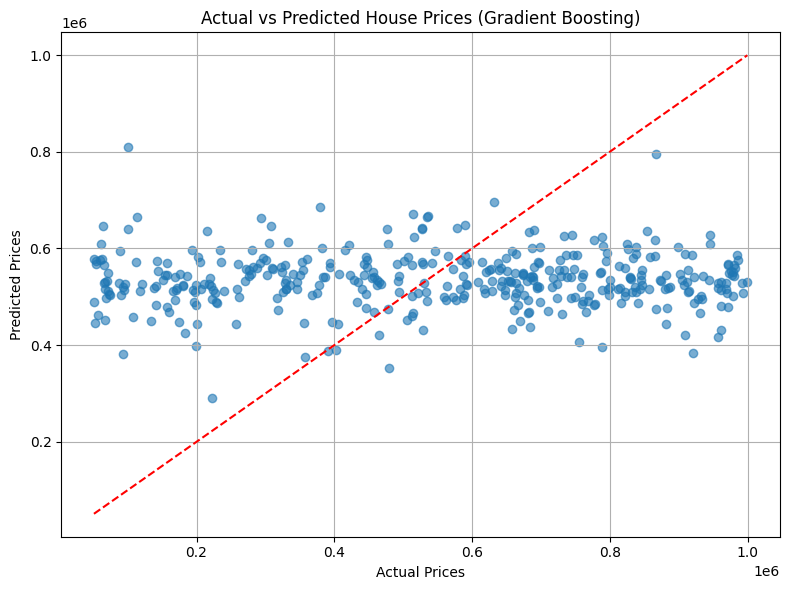

In [8]:
# Plot actual vs predicted (Gradient Boosting)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, results['Gradient Boosting']['Predictions'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()


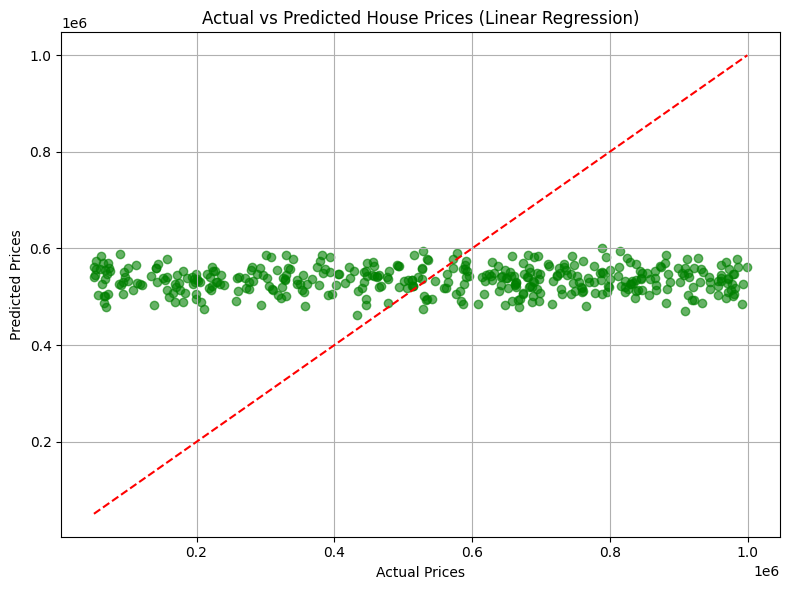

In [9]:
# Plot actual vs predicted (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, results['Linear Regression']['Predictions'], alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()
